In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action = "ignore")

In [2]:
df=pd.read_csv("student_clustering.csv")
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


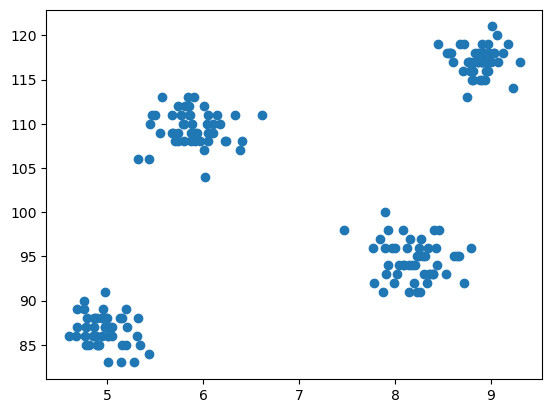

In [3]:
plt.scatter(df['cgpa'],df['iq'])

In [4]:
#import library
from sklearn.cluster import KMeans

In [23]:
# Elbow method
wcs=[]

for i in range (1,11):
    km=KMeans(n_clusters=i)
    km.fit_predict(df)
    wcs.append(km.inertia_)

In [6]:
wcs

[29957.898287999997,
 4184.14127,
 2364.005583420083,
 681.96966,
 587.7764274703559,
 481.2801216801419,
 336.50554710765425,
 284.7369459113017,
 225.10693920005883,
 187.79503777831644]

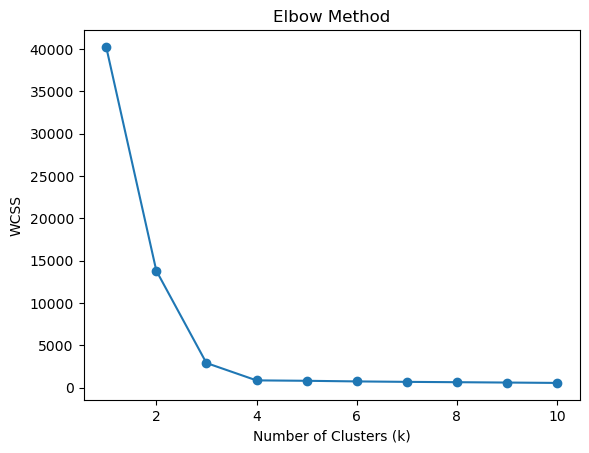

In [24]:
plt.plot(range(1, 11), wcs, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [25]:
#Silhouette Score -higher silhouette score means better-defined clusters.
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(df)
    score = silhouette_score(df, labels)
    print(f"k={k} → silhouette score = {score}")


k=2 → silhouette score = 0.6496896485240311
k=3 → silhouette score = 0.813214810007197
k=4 → silhouette score = 0.7866368195639243
k=5 → silhouette score = 0.6641868527316697
k=6 → silhouette score = 0.6609872926434628
k=7 → silhouette score = 0.35619181711313225
k=8 → silhouette score = 0.5044245872327746
k=9 → silhouette score = 0.35818264859937865
k=10 → silhouette score = 0.2520372047867314


In [26]:
X=df.iloc[:,:].values
km=KMeans(n_clusters=4)
y_mean=km.fit_predict(X)

In [27]:
y_mean

array([3, 0, 1, 0, 0, 0, 2, 0, 2, 3, 1, 1, 0, 2, 3, 1, 3, 0, 1, 0, 1, 1,
       0, 2, 2, 2, 3, 1, 0, 0, 2, 0, 3, 0, 0, 1, 2, 2, 1, 3, 0, 3, 0, 2,
       1, 1, 2, 0, 1, 2, 3, 2, 3, 1, 1, 0, 2, 2, 0, 2, 2, 3, 2, 3, 0, 2,
       1, 1, 1, 0, 1, 3, 3, 0, 2, 1, 1, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 2,
       3, 0, 2, 0, 0, 3, 2, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 2, 1, 3, 2, 0,
       2, 3, 2, 0, 1, 1, 1, 3, 1, 3, 2, 1, 1, 1, 2, 2, 3, 0, 3, 3, 3, 2,
       3, 3, 0, 1, 1, 1, 2, 0, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 0, 2,
       3, 1, 2, 0, 2, 3, 1, 2, 2, 3, 0, 3, 3, 2, 3, 2, 1, 0, 0, 0, 3, 2,
       2, 2, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 3, 1, 0, 1, 1, 1, 3, 3,
       0, 2, 3, 2, 1, 1, 3, 3, 1, 1, 1, 3, 0, 3, 3, 1, 0, 0, 2, 2, 3, 3,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 3, 3, 0, 3, 2, 1, 0, 2, 3, 3, 2,
       0, 1, 3, 2, 3, 0, 0, 3, 2, 3, 1, 2, 2, 3, 0, 1, 2, 1, 2, 0, 3, 0,
       2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, 3, 3, 3, 1, 1, 3, 2, 0, 3, 0,
       0, 3, 3, 1, 3, 1, 0, 3, 0, 3, 1, 0, 3, 3])

In [28]:
X[y_mean==0]

array([[-3.7300412730237724, 9.223149723203077, 2.6802087123483256, '1'],
       [-1.5551958595595479, 9.66567737950412, 4.324609591587755, '1'],
       [1.343533867601971, 9.585176638891488, 5.7754444764087, '1'],
       [-1.8975213342118824, 10.045285650694272, 5.5711589553443, '1'],
       [-1.757264590365976, 9.805318075241368, 3.7304913814333625, '1'],
       [-2.151410262704467, 9.575070654566556, 5.722930079403378, '1'],
       [-2.212212949819564, 9.264778978544198, 4.986327045725077, '1'],
       [-1.9941623558440904, 9.52807207911053, 5.154926522534149, '1'],
       [-1.4553955710178472, 7.63661676024123, 3.7020537963129785, '1'],
       [-1.0435488541311961, 8.788509827711787, 4.707407040916025, '1'],
       [-1.722113019310298, 10.172881707205725, 3.819196517876391, '1'],
       [-3.4286218572865534, 10.564220533215861, 3.856625543891864, '1'],
       [-5.128942727142494, 9.836188632573545, 4.726925904466273, '1'],
       [-3.9727125711848688, 9.310406405262897, 4.900934108

In [29]:
#to get 1st row
X[y_mean==1,1]

array([-8.399916840635868, -9.070651093614828, -10.511543360194855,
       -9.280508345191892, -10.150776889978218, -9.77321225052694,
       -10.867887080819653, -8.13492563696625, -8.966500151866754,
       -10.159056407833427, -10.104354842301325, -8.754387959535046,
       -9.55999173795349, -9.569876181018557, -9.441596427650628,
       -10.105921413120122, -10.586664154822742, -8.535157260751047,
       -10.077749556602173, -10.291486539209838, -10.29265380462671,
       -9.21963680521105, -7.741602788347917, -8.206151123046425,
       -8.972374507139687, -10.50696206056815, -9.77518175824531,
       -9.410609113150697, -9.438008352622074, -10.022806341516267,
       -9.316731276888577, -10.008496931179808, -7.028225575815156,
       -9.115712631670908, -11.104054229081182, -8.5228297390186,
       -9.622995001470732, -10.225697241390469, -7.289411990464701,
       -10.067058735747429, -8.534668317476111, -10.366614839486264,
       -9.262177091841833, -8.997655283391643, -11.249

In [30]:
X[y_mean==3,1]

array([6.125645022909855, 8.205162672448154, 6.459532145818887,
       7.050799345751033, 8.765091536156604, 6.938967371268878,
       6.6237974075061175, 7.794991272634699, 8.467276958705632,
       8.080511532144055, 6.793021767888176, 6.028444143435087,
       7.092588385290025, 7.559137473607269, 7.1956053240179365,
       7.900595042679243, 7.063931564135098, 9.896882718748564,
       8.819567226987886, 7.824440103123084, 8.9167095421381,
       8.159215027563844, 7.45274409747393, 7.593979741278542,
       7.526986551365926, 8.153858732042949, 8.968490628999987,
       8.49130497715851, 8.45008794504646, 9.232939555968834,
       5.021601750763118, 7.603491541818523, 8.074910038870492,
       6.54973371639513, 6.676950031256177, 6.749860908618467,
       8.524736837662648, 5.518640814834184, 6.415959253457105,
       7.197735995399055, 6.911645949376235, 6.671686807696544,
       7.10255331596548, 6.194471144281474, 6.896641845551283,
       6.719537728782883, 6.660899156552857, 

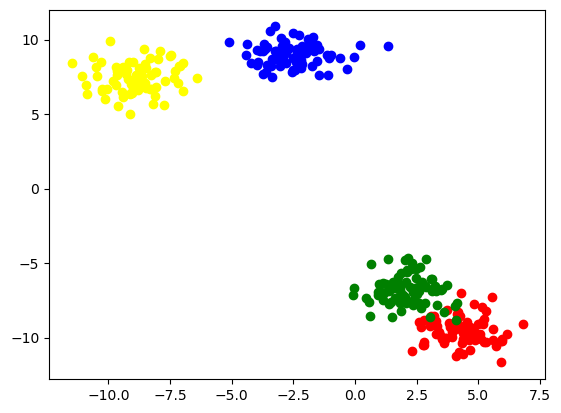

In [31]:
plt.scatter(X[y_mean==0,0],X[y_mean==0,1],color="blue")
plt.scatter(X[y_mean==1,0],X[y_mean==1,1],color="red")
plt.scatter(X[y_mean==2,0],X[y_mean==2,1],color="green")
plt.scatter(X[y_mean==3,0],X[y_mean==3,1],color="yellow")

In [32]:
#in 3d data

from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=42)

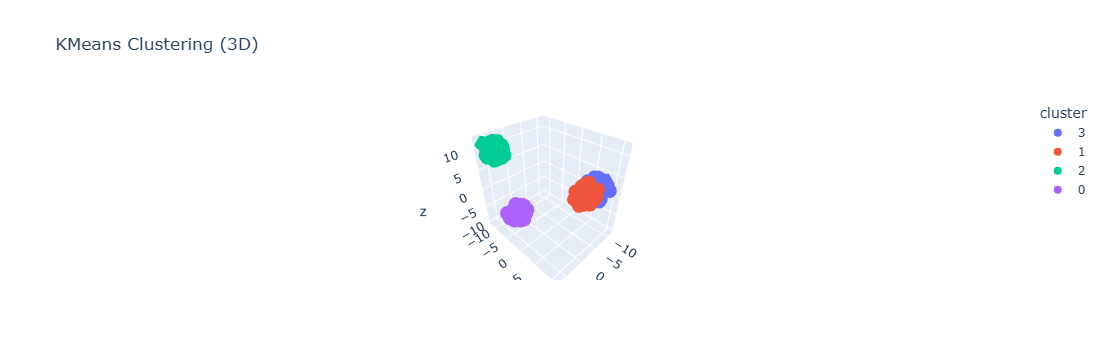

In [36]:
import plotly.express as px
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=300, centers=4, n_features=3, random_state=42) # "_" it defines the values that are not needed necessarily

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

import pandas as pd
df = pd.DataFrame(X, columns=['x', 'y', 'z'])
df['cluster'] = labels.astype(str)  # Convert to string for clear labeling

fig = px.scatter_3d(df, x='x', y='y', z='z', color='cluster', title='KMeans Clustering (3D)')
fig.show()
